<a href="https://colab.research.google.com/github/unburied/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import matplotlib.pyplot as plt
import numpy as np


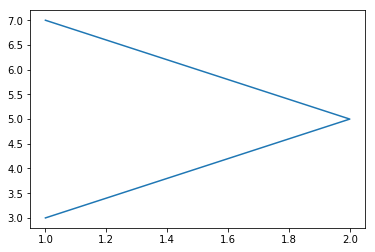

In [5]:
x = [1 , 2 , 1]
y = [3 , 5 , 7]

plt.plot(x,y);

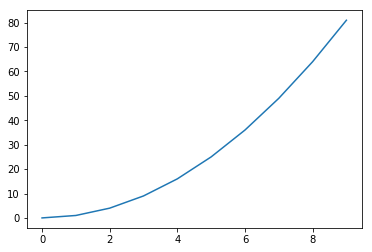

In [12]:
x = [_ for _ in range(0,10)]
y = [_ ** 2 for _ in x]

plt.plot(x,y);

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

**f(x)** is a function if for any value **'q'** in the range of **'x'**, **f(q)** is unique such that the domain of **f(q)** contains a single value, ie **f(q)** = {y}. If a verticle line is able to intercept at multiple points, **f(q)**={y<sub>1</sub>...y<sub>n</sub>  | **n** > 1}. Therefore f(x) would not be a function.  

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is the only function. This is because for any **x** in the range {1,2,6}, there exist a single value in the domain of y. 

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

 The dimensionality of **m** is R<sup>3</sup> 
 
 The dimensionality of **n** is R<sup>2</sup>

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

It is possible. f(x) = (x, x) 

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{equation}
p(\begin{bmatrix}1 \\ 0\end{bmatrix}) = \begin{bmatrix} 1 \\-1 \\  \end{bmatrix}
\end{equation}
\
\begin{equation}
p(\begin{bmatrix}0 \\ 1\end{bmatrix}) = \begin{bmatrix} 3 \\2 \\  \end{bmatrix}
\end{equation}
\
\begin{equation}
T = \begin{bmatrix} 1 & 3\\-1 & 2 \\  \end{bmatrix}
\end{equation}

\begin{equation}
q(\begin{bmatrix}1 \\ 0 \\0\end{bmatrix}) = \begin{bmatrix} 4 \\ -1 \\ 5 \end{bmatrix} 
\end{equation}
\
\begin{equation}
q(\begin{bmatrix}0 \\ 1 \\0\end{bmatrix}) = \begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix} 
\end{equation}
\
\begin{equation}
q(\begin{bmatrix}0 \\ 0 \\1\end{bmatrix}) = \begin{bmatrix} 2 \\ 3 \\ -2 \end{bmatrix} 
\end{equation}
\
\begin{equation}
T = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix} 
\end{equation}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
def p(x_1, x_2):
  return np.array([x_1 + 3 * x_2, 2 * x_2 - x_1])

def t(x_1, x_2):
  T = np.array([[1,3] , [-1,2]])
  vals = np.array([x_1, x_2])
  
  return np.matmul(T,vals)

In [28]:
tradish = p(2,2)
vec_mat = t(2,2)

tradish , vec_mat

(array([8, 2]), array([8, 2]))

In [0]:
def q(x_1, x_2, x_3):
  r1 = 4*x_1 + x_2 + 2*x_3
  r2 = 2*x_2 - x_1 + 3*x_3
  r3 = 5*x_1 - 2*x_3 + x_2
  
  return np.array([r1,r2,r3])

def T(x_1, x_2, x_3):
  T = np.array([[4,1,2] , [-1,2,3], [5,1,-2]])
  vals = np.array([x_1, x_2, x_3])
  
  return np.matmul(T,vals)

In [30]:
tradish_2 = q(3,4,5)
vec_mat_2 = T(3,4,5)

tradish_2 , vec_mat_2

(array([26, 20,  9]), array([26, 20,  9]))

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are vectors that DO NOT change direction as a result of a tranformation. 

Eigenvalues are how tranformations affect eigenvectors. Although their direction in space has not change, tranformations MAY scale eigenvectors. the magnitude of the scaling is considered the eigenvalue. 

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?
High dimenionality at best, cause frustration when trying to determine which values are the most relevant with respect to a given problem. At worst, the result in a very demanding amount of computational power to work on said problem. Also, redundancy is a thing. 

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

n>p where n = observations and p = parameters.
Idealy n >= 5p

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import pandas as pd
from sklearn.decomposition import PCA

In [0]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'
df = pd.read_csv(url)

In [0]:
df.drop(columns ='species', inplace = True)

In [52]:
pca = PCA(2)
pca.fit(df)
component1 = pca.components_[0]
component2 = pca.components_[1]

component1,component2

(array([ 0.36158968, -0.08226889,  0.85657211,  0.35884393]),
 array([ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]))

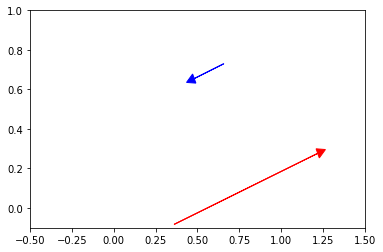

In [59]:
plt.arrow(component1[0], component1[1], component1[2], component1[3],
         head_width=.05, head_length=.05, color = 'r')
plt.arrow(component2[0], component2[1], component2[2], component2[3],
         head_width=.05, head_length=.05, color = 'b')

plt.xlim(-.5,1.5)
plt.ylim(-.1,1)

plt.show();



# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)